## Case Study - Churn Prediction


Assignment: https://github.com/GalvanizeDataScience/supervised-learning-case-study/blob/master/group.md

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of
users who signed up for an account in January 2014. The data was pulled on July
1, 2014; we consider a user retained if they were “active” (i.e. took a trip)
in the preceding 30 days (from the day the data was pulled). In other words, a
user is "active" if they have taken a trip since June 1, 2014. The data,
`churn.csv`, is in the [data](data) folder.  The data are split into train and
test sets.  You are encouraged to tune and estimate your model's performance on
the train set, then see how it does on the unseen data in the test set at the
end.

We would like you to use this data set to help understand **what factors are
the best predictors for retention**, and offer suggestions to help Company X. 
Therefore, your task is not only to build a
model that minimizes error, but also a model that allows you to interpret the
factors that contributed to your predictions.

Here is a detailed description of the data:

- `city`: city this user signed up in phone: primary device for this user
- `signup_date`: date of account registration; in the form `YYYYMMDD`
- `last_trip_date`: the last time this user completed a trip; in the form `YYYYMMDD`
- `avg_dist`: the average distance (in miles) per trip taken in the first 30 days after signup
- `avg_rating_by_driver`: the rider’s average rating over all of their trips 
- `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips 
- `surge_pct`: the percent of trips taken with surge multiplier > 1 
- `avg_surge`: The average surge multiplier over all of this user’s trips 
- `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up 
- `luxury_car_user`: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise 
- `weekday_pct`: the percent of the user’s trips occurring during a weekday


In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime as dt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


plt.style.use('ggplot')

In [187]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_6_Lectures/supervised-learning-case-study/data/churn_train.csv')

In [85]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


In [86]:
df.isna().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                      319
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [87]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user              bool
weekday_pct               float64
dtype: object

In [88]:
def churncreation(df):
    df['churn'] = df['last_trip_date'] < '2014-06-01'
    return df

In [89]:
churncreation(df)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,True
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,True
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,True
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,True
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,True
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0,True
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7,True
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0,True
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7,True
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0,True


In [90]:
df = df.dropna()

In [94]:
df[['luxury_car_user', 'churn']] = df[['luxury_car_user', 'churn']].astype(int)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [118]:
df = df.drop(columns=['last_trip_date'])

In [119]:
X = df.drop(columns='churn').values
y = df['churn'].values

In [120]:
X.shape

(33132, 11)

In [151]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [134]:
def plot_classification_date(X, y, ax):
    # pass a class into an array of indices corresponding to it
    colors = np.array(['Red','blue'])[y]
    ax.scatter(X[:,0], X[:,1], c=colors)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('Feature 1 vs Feature 2')

In [154]:
def plot_classification_scatter(df, y):
    colors = np.array(['#0392cf', '#e41a1c'])[y]
    ax = scatter_matrix(df, color=colors, alpha=0.6, figsize=(25,25), diagonal='kde')
    plt.tight_layout()

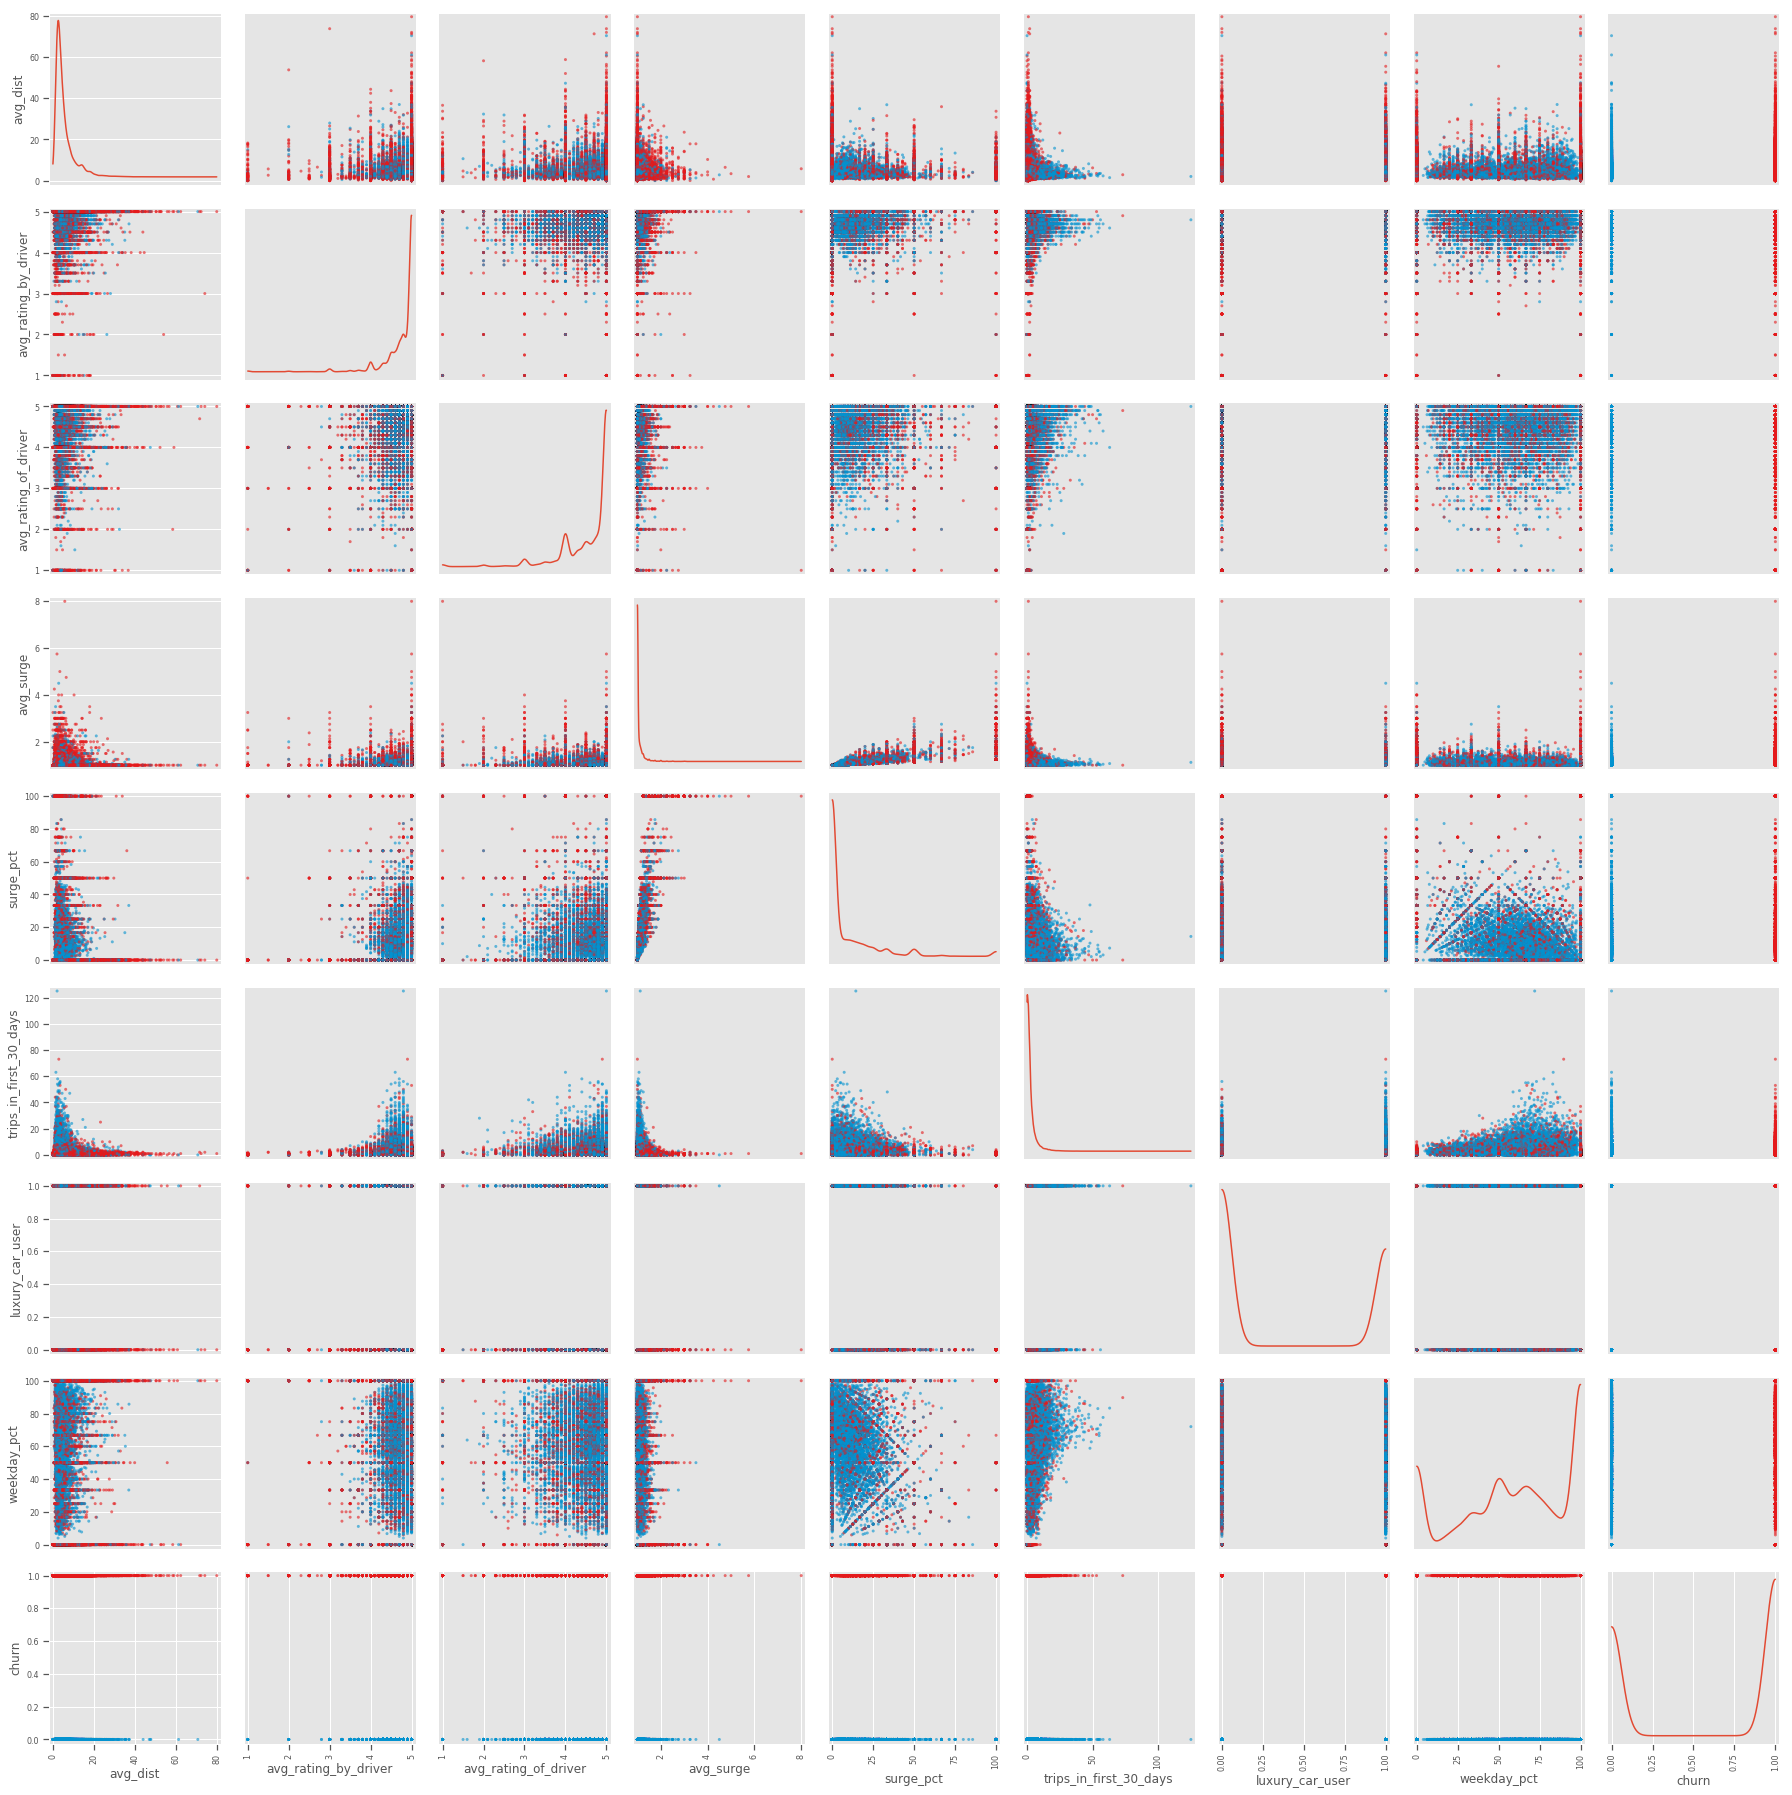

In [155]:
plot_classification_scatter(df, y)

In [158]:
raw_data_train = pd.read_csv('/home/asus/G_school_lectures/Week_6_Lectures/supervised-learning-case-study/data/churn_train.csv')

In [160]:
# various pandas commands to clean the data of null values and to create the churn column
raw_data_train['avg_rating_of_driver'] = raw_data_train['avg_rating_of_driver'].fillna(raw_data_train['avg_rating_of_driver'].mean())
raw_data_train['avg_rating_by_driver'] = raw_data_train['avg_rating_by_driver'].fillna(raw_data_train['avg_rating_by_driver'].mean())
raw_data_train["phone"].fillna("Other", inplace = True)
raw_data_train["signup_date"] = pd.to_datetime(raw_data_train["signup_date"])
raw_data_train["last_trip_date"] = pd.to_datetime(raw_data_train["last_trip_date"])
raw_data_train["churn?"] = raw_data_train['last_trip_date'].apply(lambda x : True if x < dt.datetime.strptime('2014-06-01',"%Y-%m-%d") else False)
# creates the y_train
y_train = raw_data_train[["churn?"]].copy()
raw_data_train.loc[raw_data_train['churn?'] == True, ['churn?']] = '1'
raw_data_train.loc[raw_data_train['churn?'] == False, ['churn?']] = '0'
raw_data_train.loc[raw_data_train['luxury_car_user'] == True, ['luxury_car_user']] = '1'
raw_data_train.loc[raw_data_train['luxury_car_user'] == False, ['luxury_car_user']] = '0'
raw_data_train.loc[raw_data_train['phone'] == "Android", ['phone']] = '0'
raw_data_train.loc[raw_data_train['phone'] == "iPhone", ['phone']] = '1'
raw_data_train.loc[raw_data_train['phone'] == "Other", ['phone']] = '2'
raw_data_train.loc[raw_data_train['city'] == "Astapor", ['city']] = '0'
raw_data_train.loc[raw_data_train['city'] == "Winterfell", ['city']] = '1'
raw_data_train.loc[raw_data_train['city'] == "King's Landing", ['city']] = '2'

In [161]:
# removes churn from raw_data_train to create a test set
# and removes bad columns
raw_data_train = raw_data_train.drop(columns=["churn?"])
raw_data_train = raw_data_train.drop(columns=["last_trip_date"])
raw_data_train = raw_data_train.drop(columns=["signup_date"])

In [162]:
raw_data_train

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.000000,1.00,0,0,0.0,0,0,100.0
1,8.06,5.0,5.000000,1.00,0,0,0.0,2,1,0.0
2,21.50,4.0,4.601697,1.00,1,1,0.0,1,1,100.0
3,9.46,5.0,4.601697,2.75,1,0,100.0,1,0,100.0
4,13.77,5.0,4.601697,1.00,1,1,0.0,0,0,100.0
5,14.51,5.0,4.601697,1.00,0,1,0.0,0,1,100.0
6,4.87,4.7,4.000000,1.00,0,0,0.0,0,0,66.7
7,1.78,4.0,5.000000,1.00,1,1,0.0,3,0,0.0
8,6.87,5.0,4.700000,1.00,0,0,0.0,3,0,66.7
9,2.41,5.0,3.000000,1.00,1,1,0.0,1,0,100.0


In [169]:
y_train = y_train.astype(int).values
X_train = raw_data_train.values

In [178]:
def feature_graph(estimator, X):
    # X should not just be .values it must be a dataframe to get colnames
    feat_scores = pd.Series(estimator.feature_importances_,
                           index= X.columns)
    # sort feature scores for graph
    feat_scores = feat_scores.sort_values()
    # plot feature scores
    ax = feat_scores.plot(kind='barh',
                         figsize=(10,8),
                         color='b')
    # model name for every estimator
    model_name = type(estimator).__name__
    ax.set_title('Average Feature Importance for {} Model'.format(
        model_name))
    ax.set_xlabel('Average contribution to information gain')

In [172]:
gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls', n_estimators=100, random_state=1)
X_train = raw_data_train.values
gdbr.fit(X_train, y_train)
print(gdbr.feature_importances_)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.01594386 0.25524344 0.01215692 0.00492768 0.18173921 0.08834898
 0.17539128 0.04159286 0.06934238 0.15531339]


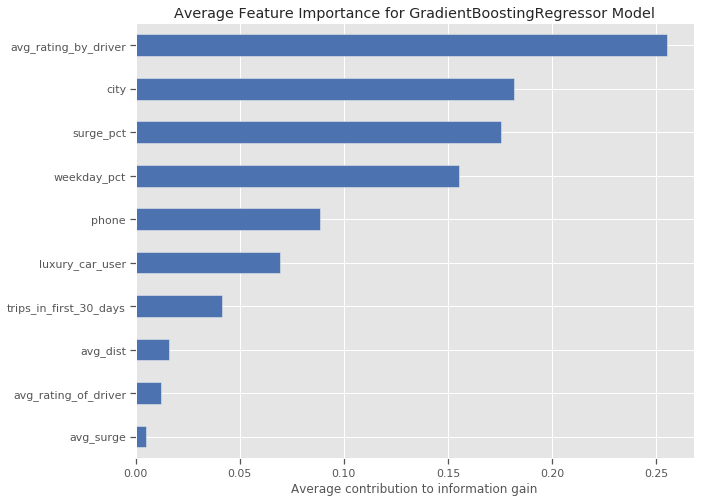

In [180]:
feature_graph(gdbr, raw_data_train)

In [173]:
clf = RandomForestClassifier(max_features='auto', oob_score=True, n_estimators=100)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
# print(clf.score(X_test, y_test))

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.29883064 0.11326676 0.07971056 0.07099257 0.07899998 0.03726254
 0.08367195 0.07496768 0.03184771 0.1304496 ]


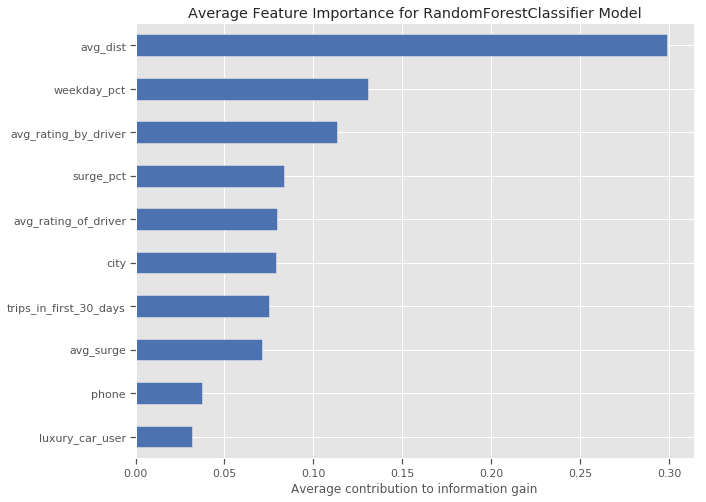

In [181]:
feature_graph(clf, raw_data_train)

In [174]:
abr = AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1, loss='linear', n_estimators=100, random_state=1)
abr.fit(X_train, y_train)
print(abr.feature_importances_)
# print(abr.score(X_test, y_test))

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.39578988 0.09374719 0.10138483 0.05016283 0.04943583 0.02221696
 0.05541221 0.07974451 0.02432199 0.12778376]


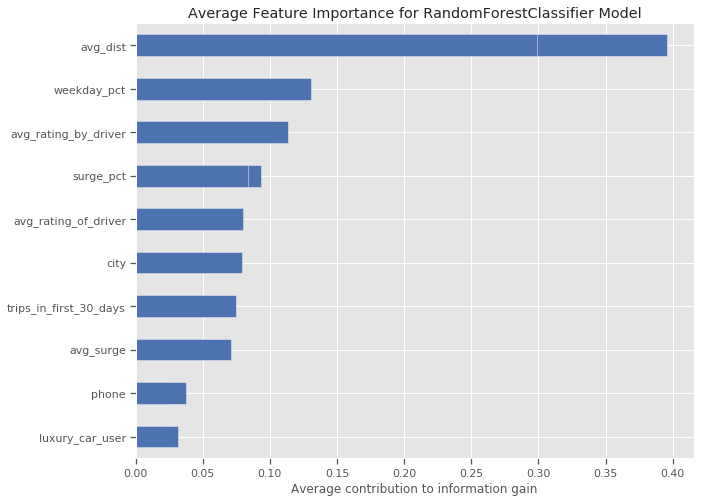

In [183]:
feature_graph(abr, raw_data_train)

In [184]:
#visualize confusion matrix
from sklearn.metrics import confusion_matrix
labels = [0, 1]
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'y_test' is not defined

In [199]:
import datetime as dt

def auto_dummy(df, cols, drop, pprint=False):
    '''
    cols as list of columns
    drop, which value to drop, 'drop_first' -> automatically drop first
    '''
    df_temp = df.copy()
    if type(cols) == str:
        cols = [cols]  
    if type(drop) == str:
        drop = [drop]
    for i,col in enumerate(cols):
        if pprint: print(col)
        pref = ''#col.strip()[:2]
        if drop[i] == 'drop_first':
            if pprint: print(col, ' dropping first')
            df_add = pd.get_dummies(df_temp[col], prefix=pref, drop_first=True)
            df_temp = df_temp.join(df_add)
            df_temp.drop(col, axis=1, inplace=True)
        else:
            df_add = pd.get_dummies(df_temp[col], prefix=pref)
            df_temp = df_temp.join(df_add)
            if pprint: print('droping ', col)
            try:
                df_temp.drop([col, pref + '_' + str(drop[i])], axis=1, inplace=True)
            except Exception as e: print('oops', col, e)
    return df_temp  


def googone(df, train = True, drops = None, pprint=False):
    '''
    df = pandas df
    train = bool = is it training set (vs test set)
    drops = list or str = what columns to drop immediately
    '''
    df_temp = df.copy()
    
    #CREATE churn column:
    df_temp["signup_date"] = pd.to_datetime(df_temp["signup_date"])
    df_temp["last_trip_date"] = pd.to_datetime(df_temp["last_trip_date"])
    df_temp["Churn?"] = df_temp['last_trip_date'] \
    .apply(lambda x : True if x < dt.datetime.strptime('2014-06-01',"%Y-%m-%d") else False).astype(int)

    #DROP USELESS
    if drops != None:
        if type(drops) == str: drops = [drops]
        keeps = [col for col in df_temp.columns if col not in drops]
        df_temp = df_temp[keeps]
        
    #DROP LAST_TRIP_DATE
    df_temp.drop('last_trip_date', axis=1, inplace=True)
    
    #DROP ROWS // DON'T DO THESE FOR THE TES TEST SET
    if train: 
        df_temp.dropna(inplace=True)  #DROP ALL NULLS FOR NOW
        df_temp = df_temp[df_temp['avg_dist']>0] #DROP ALL AVG_DIST = 0
        df_temp = df_temp[df_temp['signup_date'] < '2014-06-01'] #DROP SIGNUPS IN JUNE - INVALID FOR PREDICTION
    
    #convert DATES
    df_temp['signup_date'] = pd.to_datetime(df_temp['signup_date'])
    
    
    #converty BOOLEANS
    df_temp['luxury_car_user']  = df_temp['luxury_car_user']*1
    
    #ONE HOT FEATURES - Drop original features
    features = ['city','phone']
    
    tops = [] #determine the most common value for the feature
    if pprint: print('doing dummies')
    for f in features:
        top = df_temp.groupby(f).count().sort_values(by=df_temp.columns[0], ascending=False).reset_index()[f][0]
        tops.append(top)
    df_temp = auto_dummy(df_temp, features, tops, pprint=pprint)
        
    return df_temp

In [200]:
dft = googone(df, pprint=False)

In [201]:
dft

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churn?,_Astapor,_King's Landing,_Android
0,6.94,5.0,5.0,1.00,2014-01-12,0.0,0,0,100.0,1,1,0,1
1,8.06,5.0,5.0,1.00,2014-01-25,0.0,2,1,0.0,1,1,0,1
6,4.87,4.7,4.0,1.00,2014-01-18,0.0,0,0,66.7,1,1,0,1
7,1.78,4.0,5.0,1.00,2014-01-11,0.0,3,0,0.0,1,0,0,0
8,6.87,5.0,4.7,1.00,2014-01-01,0.0,3,0,66.7,1,1,0,1
9,2.41,5.0,3.0,1.00,2014-01-28,0.0,1,0,100.0,1,0,0,0
12,5.42,4.7,5.0,1.00,2014-01-05,0.0,2,1,33.3,0,1,0,0
13,5.02,5.0,5.0,1.00,2014-01-19,0.0,1,0,0.0,1,1,0,1
14,4.28,5.0,4.0,1.15,2014-01-14,20.0,2,0,40.0,0,0,0,1
15,3.40,5.0,5.0,1.00,2014-01-16,0.0,1,1,100.0,1,1,0,1


In [204]:
y = dft['Churn?']

In [203]:
def plot_classification_scatter(df, y):
    colors = np.array(['#0392cf', '#e41a1c'])[y]
    ax = scatter_matrix(df, color=colors, alpha=0.6, figsize=(25,25), diagonal='kde')
    plt.tight_layout()

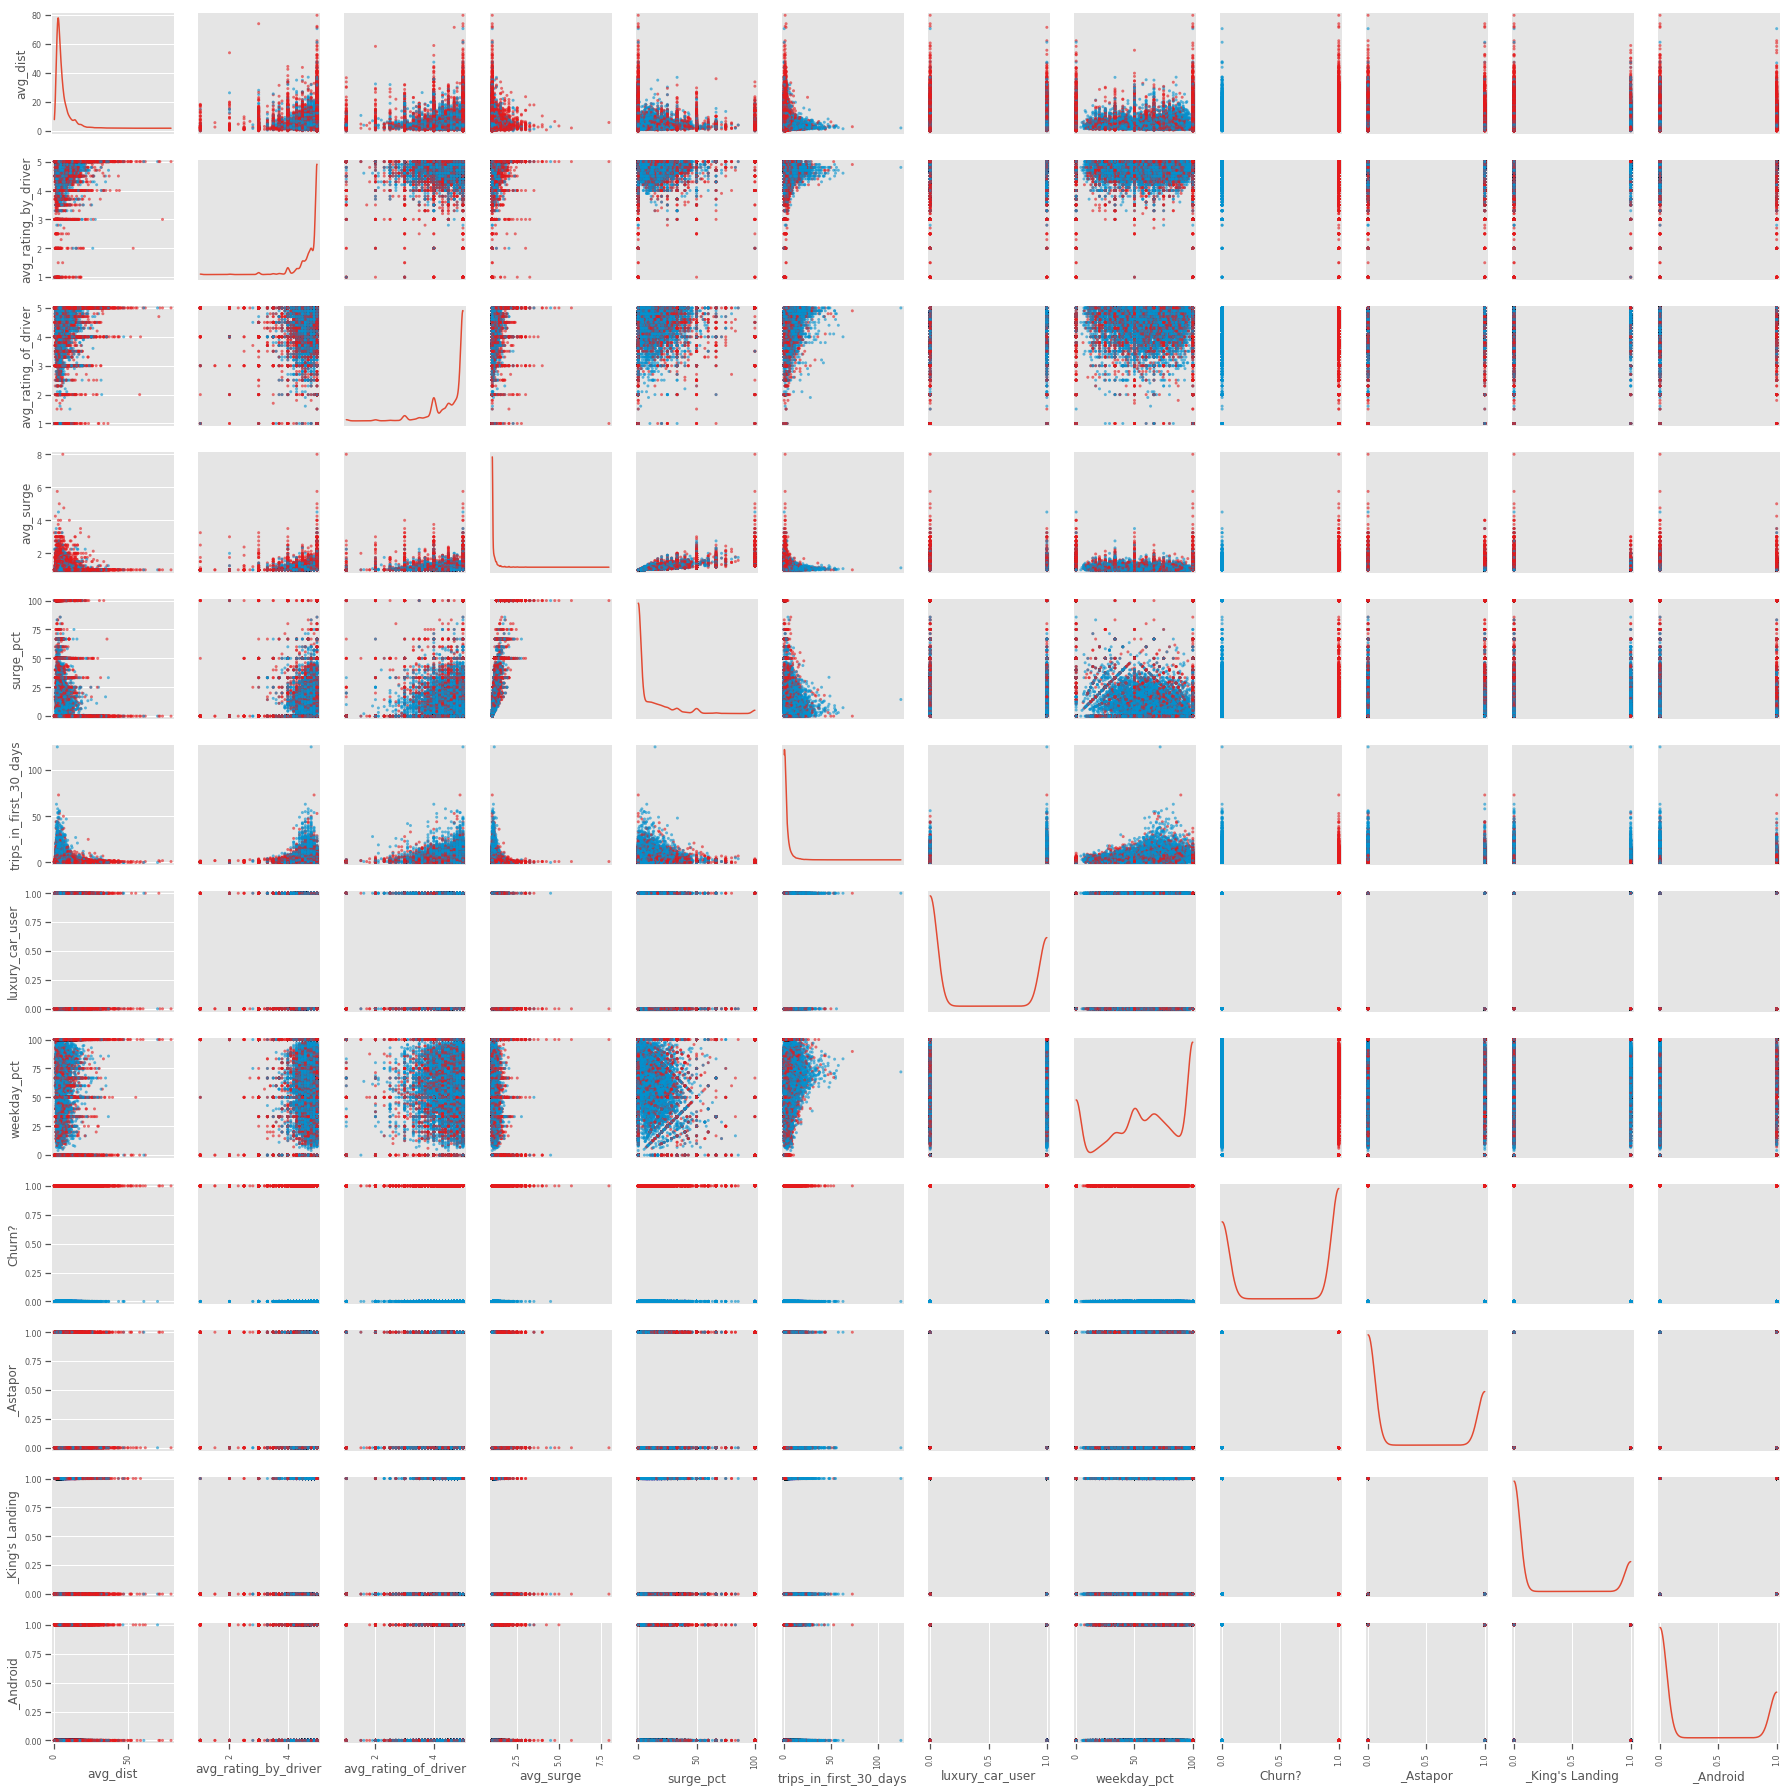

In [206]:
plot_classification_scatter(dft,y)